<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [0]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 50
RMS = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
#Define model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [0]:
#Compile model
history = model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(x_val, y_val), shuffle = True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 731s 18ms/step - loss: 8.0806 - acc: 0.1253 - val_loss: 2.1704 - val_acc: 0.2082
Epoch 2/50
40000/40000 [==============================] - 727s 18ms/step - loss: 2.2758 - acc: 0.1862 - val_loss: 2.0299 - val_acc: 0.2830
Epoch 3/50
40000/40000 [==============================] - 745s 19ms/step - loss: 2.0645 - acc: 0.2445 - val_loss: 1.8838 - val_acc: 0.3393
Epoch 4/50
40000/40000 [==============================] - 735s 18ms/step - loss: 1.9536 - acc: 0.2891 - val_loss: 1.7910 - val_acc: 0.3667
Epoch 5/50
40000/40000 [==============================] - 724s 18ms/step - loss: 1.8748 - acc: 0.3173 - val_loss: 1.7101 - val_acc: 0.3943
Epoch 6/50
40000/40000 [==============================] - 724s 18ms/step - loss: 1.8075 - acc: 0.3372 - val_loss: 1.6607 - val_acc: 0.4088
Epoch 7/50
40000/40000 [==============================] - 733s 18ms/step - loss: 1.7553 - acc: 0.3590 - val_loss: 1.

In [40]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=1)

10000/10000 [==============================] - 16s 2ms/step


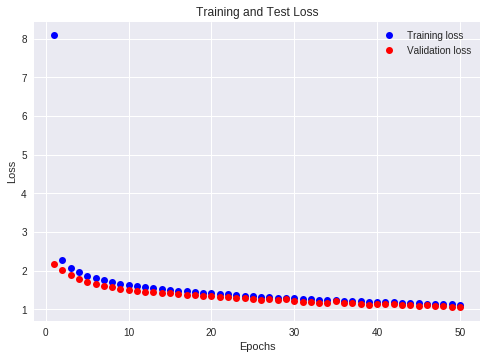

In [38]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

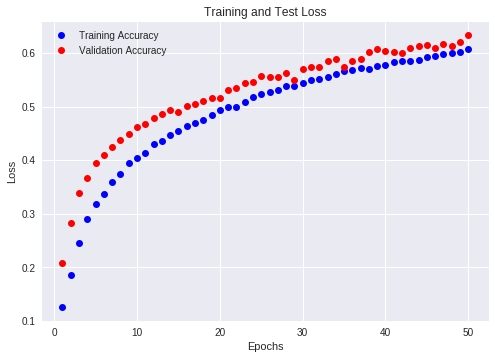

In [39]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()